In [1]:
import pandas as pd
import ktrain
from ktrain import text
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import disarray

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 

In [2]:
DATA_PATH = 'Reg_train_dep_prepro_one_encode.csv'
NUM_WORDS = 50000
MAXLEN = 70
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'text_cleaned',
                      label_columns = ["severe", "moderate", "mild"],
                      val_filepath="Reg_test_dep_prepro_one_encode.csv", # if None, 10% of data will be used for validation
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=2)

detected encoding: utf-8 (if wrong, set manually)
['severe', 'moderate', 'mild']
   severe  moderate  mild
0     0.0       1.0   0.0
1     0.0       1.0   0.0
2     0.0       1.0   0.0
3     0.0       0.0   1.0
4     0.0       1.0   0.0
['severe', 'moderate', 'mild']
   severe  moderate  mild
0     0.0       0.0   1.0
1     0.0       1.0   0.0
2     0.0       0.0   1.0
3     0.0       0.0   1.0
4     0.0       1.0   0.0
language: en
Word Counts: 33286
Nrows: 58684
58684 train sequences
train sequence lengths:
	mean : 21
	95percentile : 43
	99percentile : 49
Adding 2-gram features
max_features changed to 362640 with addition of ngrams
Average train sequence length with ngrams: 41
train (w/ngrams) sequence lengths:
	mean : 41
	95percentile : 85
	99percentile : 97
x_train shape: (58684,70)
y_train shape: (58684, 3)
Is Multi-Label? False
14671 test sequences
test sequence lengths:
	mean : 21
	95percentile : 42
	99percentile : 48
Average test sequence length with ngrams: 37
test (w/ngrams) 

In [3]:
model = text.text_classifier('fasttext', (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 70
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1834/1834 [==============================] - 219s 118ms/step - loss: 3.4529 - accuracy: 0.3980
Epoch 2/1024
1834/1834 [==============================] - 2s 1ms/step - loss: 1.7651 - accuracy: 0.3385


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


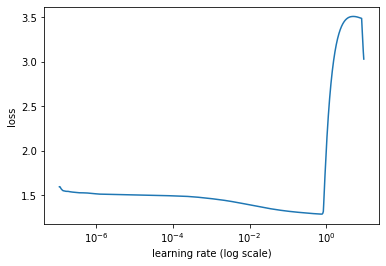

In [4]:
learner.lr_find()
learner.lr_plot()

In [5]:
learner.autofit(0.01)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
1834/1834 [==============================] - 219s 119ms/step - loss: 0.7956 - accuracy: 0.6313 - val_loss: 0.5208 - val_accuracy: 0.7831
Epoch 2/1024
1834/1834 [==============================] - 217s 118ms/step - loss: 0.5490 - accuracy: 0.7688 - val_loss: 0.4620 - val_accuracy: 0.8125
Epoch 3/1024
1834/1834 [==============================] - 217s 118ms/step - loss: 0.4587 - accuracy: 0.8155 - val_loss: 0.4502 - val_accuracy: 0.8177
Epoch 4/1024
1834/1834 [==============================] - 217s 118ms/step - loss: 0.3947 - accuracy: 0.8455 - val_loss: 0.4426 - val_accuracy: 0.8254
Epoch 5/1024
1834/1834 [==============================] - 219s 120ms/step - loss: 0.3370 - accuracy: 0.8707 - val_loss: 0.4694 - val_accuracy: 0.8286
Epoch 6/1024
1834/1834 [==============================] - ETA: 0s -

In [6]:
learner.validate(class_names=preproc.get_classes())

              precision    recall  f1-score   support

      severe       0.85      0.74      0.79      3065
    moderate       0.77      0.83      0.80      5621
        mild       0.87      0.86      0.87      5985

    accuracy                           0.83     14671
   macro avg       0.83      0.81      0.82     14671
weighted avg       0.83      0.83      0.83     14671



array([[2265,  662,  138],
       [ 312, 4687,  622],
       [  84,  744, 5157]], dtype=int64)

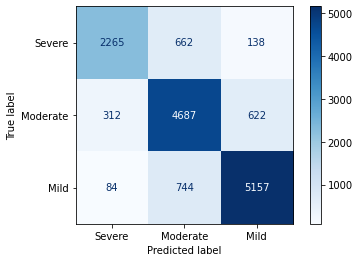

In [7]:
labels = ["Severe", "Moderate", "Mild"]

cm = np.array([[2265,  662,  138],
       [ 312, 4687,  622],
       [  84,  744, 5157]])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [8]:

dfmetric = pd.DataFrame(cm, index= ["s", "m", "mi"], columns=["s", "m", "mi"])
round(dfmetric.da.export_metrics(), 3)

,s,m,mi,micro-average
accuracy,0.918,0.841,0.892,0.884
f1,0.791,0.800,0.867,0.825
false_discovery_rate,0.149,0.231,0.128,0.175
false_negative_rate,0.261,0.166,0.138,0.175
false_positive_rate,0.034,0.155,0.087,0.087
negative_predictive_value,0.933,0.891,0.905,0.913
positive_predictive_value,0.851,0.769,0.872,0.825
precision,0.851,0.769,0.872,0.825
recall,0.739,0.834,0.862,0.825
sensitivity,0.739,0.834,0.862,0.825


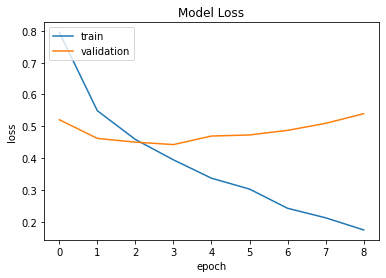

In [9]:
learner.plot("loss")

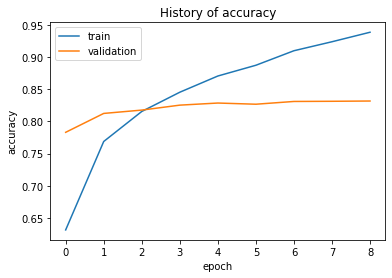

In [10]:
learner.plot("accuracy")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 64)            23208960  
                                                                 
 spatial_dropout1d (SpatialD  (None, 70, 64)           0         
 ropout1D)                                                       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                        

In [2]:

df[["text_cleaned", "label"]].to_csv("Reg_final_annotation_dep.csv", header=True, index=False, encoding='utf-8')